In [71]:
# importando bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# padronizando figuras geradas pelo Matplotlib
plt.rcParams['figure.figsize']=[12,8]

In [72]:
# carregando dados
url = 'https://github.com/higoramario/univesp-com410-aprendizado-de-maquinas/raw/main/social-network-ads.csv'
compras = pd.read_csv(url, sep=',')
"""
Compras em redes sociais (atributos):
Age: idade (em anos)
EstimatedSalary: salário estimado (anual, em dólares) 
Purchased (classe): comprado (1 - sim, 0 - não)
"""
compras

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [73]:
compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [74]:
compras.shape

(400, 3)

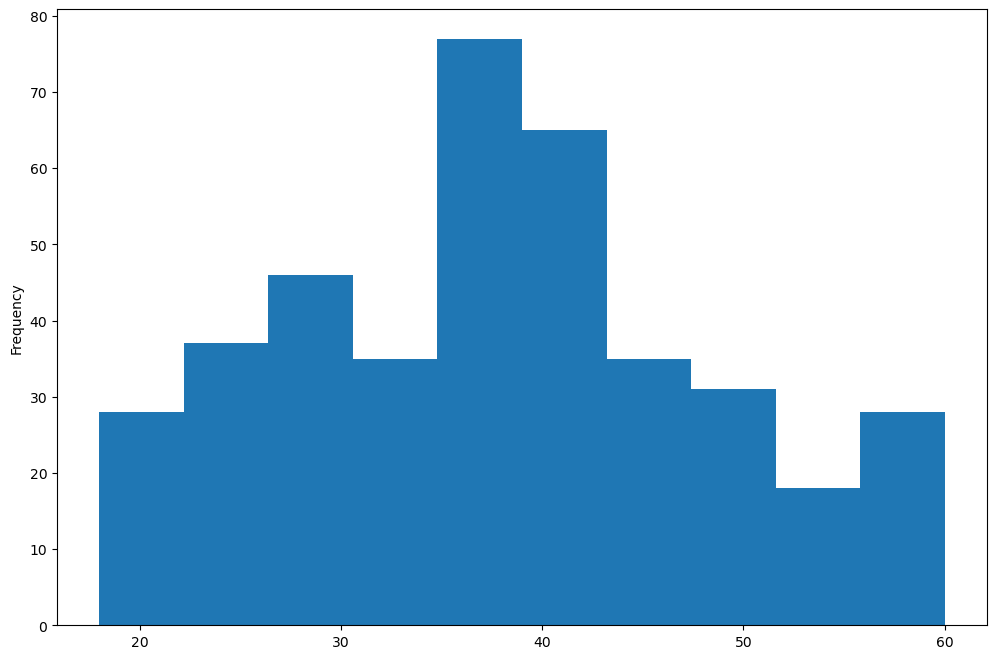

In [75]:
# histograma da Idade
compras['Age'].plot.hist()
plt.show()

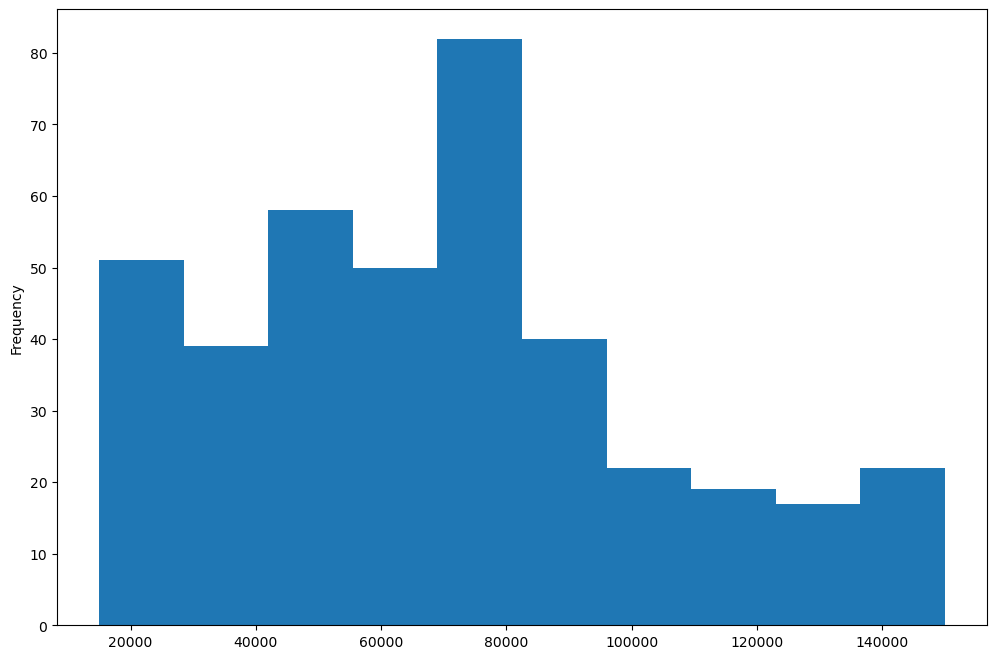

In [76]:
# hitograma salário estimado anual
compras['EstimatedSalary'].plot.hist()
plt.show()

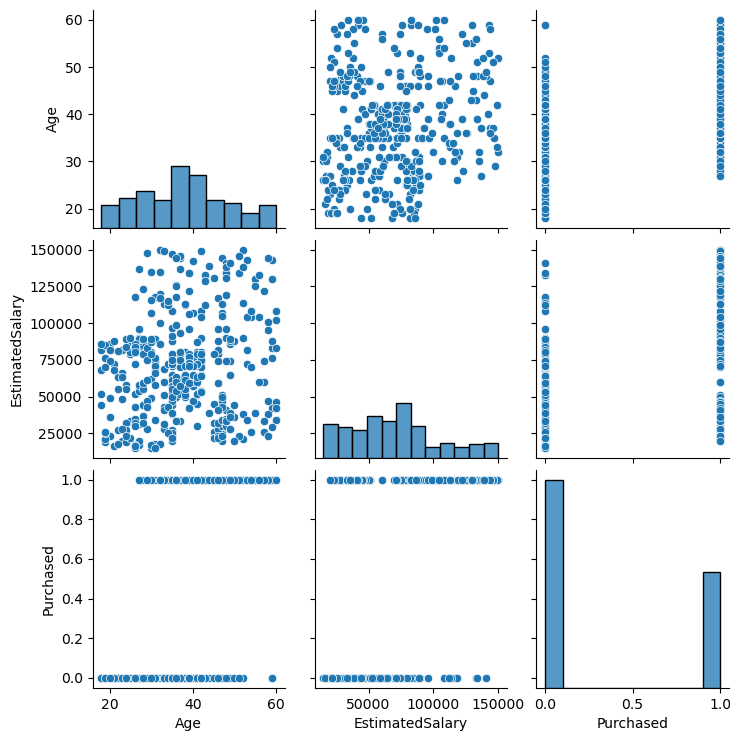

In [77]:
sns.pairplot(data=compras)

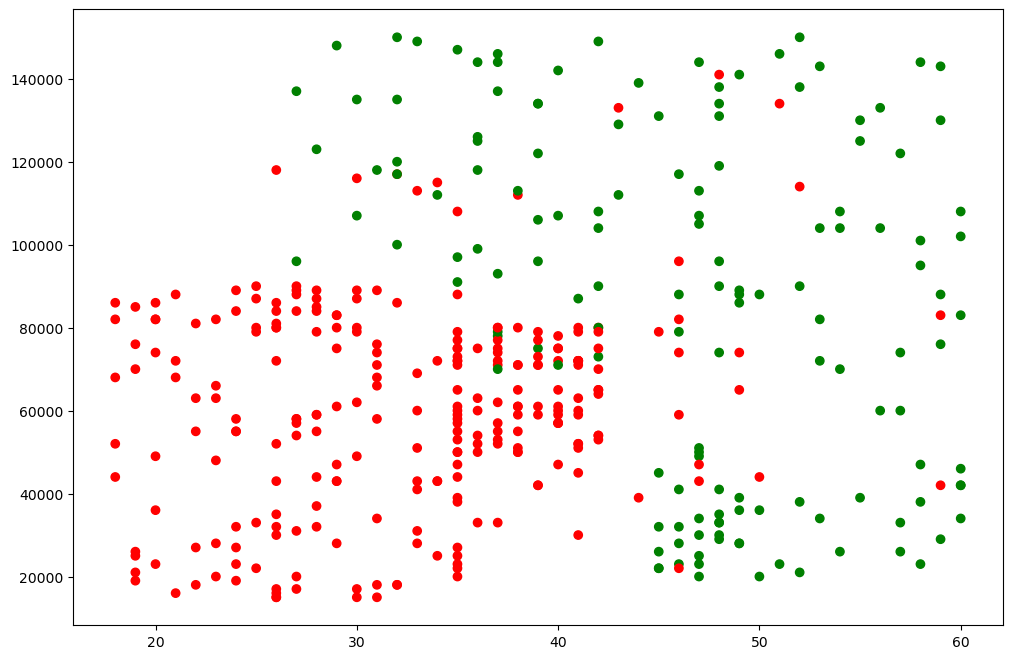

In [78]:
# gráfico de dispersão com cores aplicadas
fig, ax = plt.subplots()
colors = {0:'red', 1:'green'} # ñ comprou -> red, comprou -> verde
ax.scatter(compras['Age'], compras['EstimatedSalary'], c=compras['Purchased'].map(colors))
plt.show()

In [79]:
#criando uma lista com as classes e atributos
atributos = compras[['Age','EstimatedSalary']]
classes = compras['Purchased']

# separando os conjuntos de treinamento (90%) e teste (10%)
compras_treino, compras_teste, classes_treino, classes_teste = train_test_split(atributos, classes, test_size = 0.1)

In [80]:
# diminuir a escala dos dados para acelerar a execução do treinamento do modelo e da geração do gráfico

scaler = StandardScaler()
compras_treino = scaler.fit_transform(compras_treino)
compras_teste = scaler.transform(compras_teste)

In [81]:
# definindo função que recebe os atributos e classes do conjunto de testes, o classificador SVM e plota os resultados

# Usa as funções meshgrid do numpy, que cria um grid retangular,
# e contourf do matplotlib, que permite criar linhas e preencher áreas com cores

def visualizarSVM(atributos_t,classes_t,classificador):
  atributos, classes = atributos_t, classes_t

  ano, salario = np.meshgrid(np.arange(start = atributos[:, 0].min() - 1, stop = atributos[:, 0].max() + 1, step = 0.01),
                      np.arange(start = atributos[:, 1].min() - 1, stop = atributos[:, 1].max() + 1, step = 0.01))

  plt.contourf(ano, salario, classificador.predict(np.array([ano.ravel(), salario.ravel()]).T).reshape(ano.shape),
              alpha = 0.75, cmap = ListedColormap(('red', 'green')))

  plt.xlim(ano.min(), ano.max())
  plt.ylim(salario.min(), salario.max())

  for i, j in enumerate(np.unique(classes)):
      plt.scatter(atributos[classes == j, 0], atributos[classes == j, 1],
                  color = ListedColormap(('red', 'green'))(i), label = j)

  plt.title('Classificação SVM')
  plt.xlabel('Ano')
  plt.ylabel('Salário estimado')
  plt.legend()
  plt.show()

Parâmetros de funções de kernel:

**kernel**: 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'

**C**: determina se a margem será mais ajustada (C grande) ou mais larga (C pequeno)

**gamma**: parâmetro de ajuste para as funções polinomial e sigmoidal

**coef0**: parâmetro kappa, constante usada nas funções polinomial e sigmoidal

**degree**:grau da função polinomial

# Modelo Polinomial grau 3

In [82]:
# treinando o modelo para gerar o classificador usando a função kernel polinomial de grau 3.
SVM_polinomial = SVC(kernel = 'poly', degree = 3, gamma = 'scale', C = 1.0, coef0 = 2)
SVM_polinomial.fit(compras_treino, classes_treino)

SVC(coef0=2, kernel='poly')

In [83]:
# verificando acurácia do modelo
predicao = SVM_polinomial.predict(compras_teste)
acuracia = accuracy_score(classes_teste,predicao)
print('Acurácia de classificação: {}'.format(round(acuracia,3)*100)+'%')

Acurácia de classificação: 92.5%


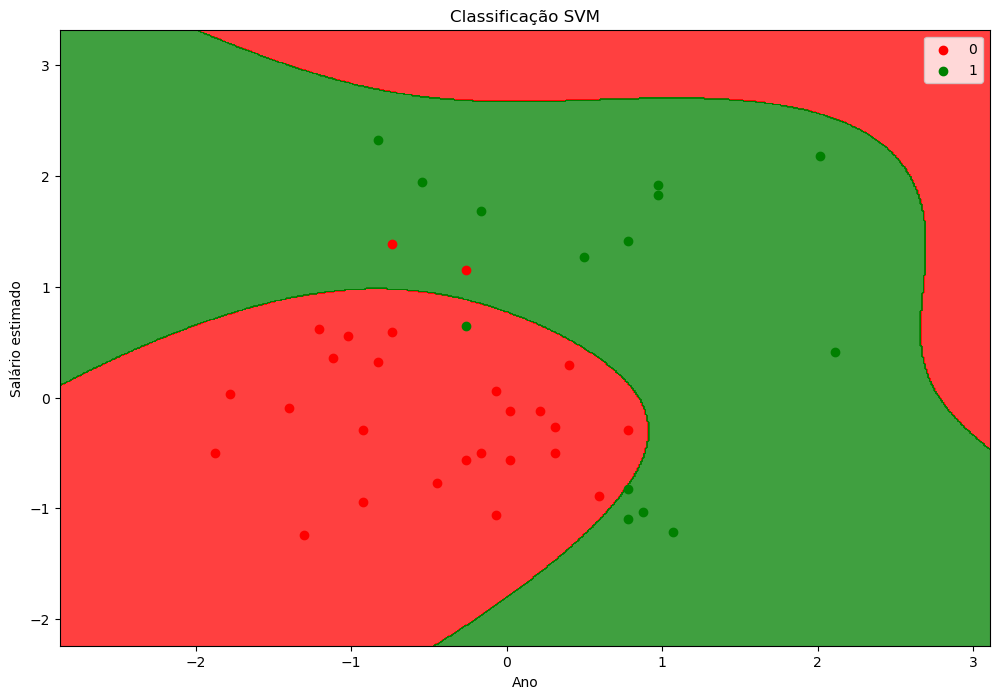

In [84]:
# visualizar o modelo
visualizarSVM(compras_teste, classes_teste,SVM_polinomial)

# Modelo Polinomial grau 2

In [85]:
# treinando o modelo para gerar o classificador usando a função kernel polinomial de grau 2.
SVM_polinomial = SVC(kernel = 'poly', degree = 2, gamma = 'scale', C = 1.0, coef0 = 2)
SVM_polinomial.fit(compras_treino, classes_treino)

SVC(coef0=2, degree=2, kernel='poly')

In [86]:
# verificando acurácia do modelo
predicao = SVM_polinomial.predict(compras_teste)
acuracia = accuracy_score(classes_teste,predicao)
print('Acurácia de classificação: {}'.format(round(acuracia,3)*100)+'%')

Acurácia de classificação: 92.5%


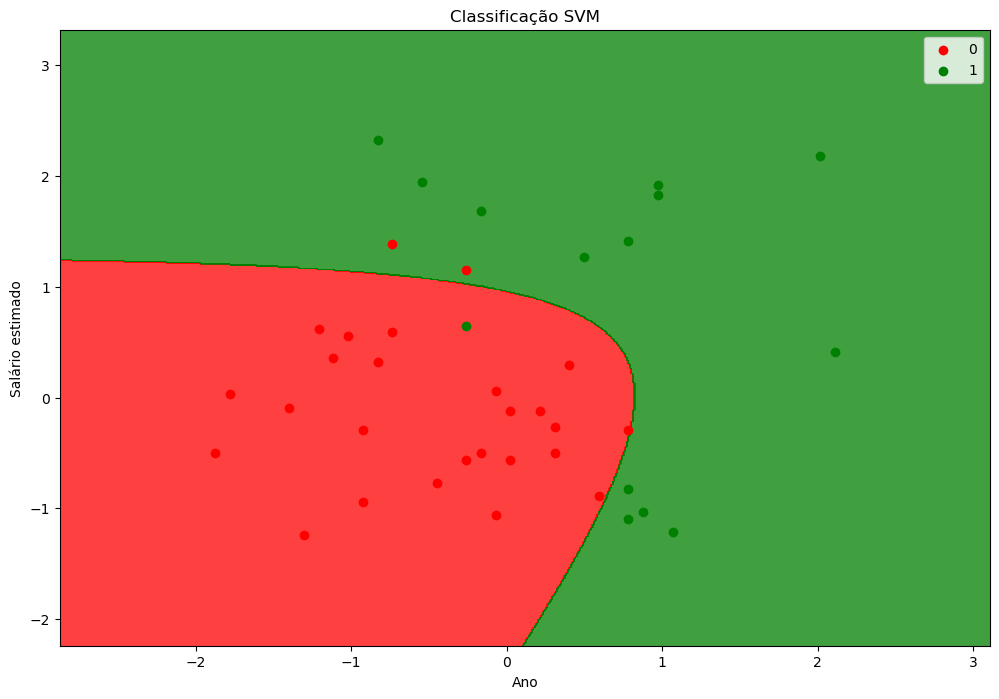

In [87]:
# visualizar o modelo
visualizarSVM(compras_teste, classes_teste,SVM_polinomial)

# Modelo Polinomial grau 1

In [88]:
# treinando o modelo para gerar o classificador usando a função kernel polinomial de grau 1.
SVM_polinomial = SVC(kernel = 'poly', degree = 1, gamma = 'scale', C = 1.0, coef0 = 2)
SVM_polinomial.fit(compras_treino, classes_treino)

SVC(coef0=2, degree=1, kernel='poly')

In [89]:
# verificando acurácia do modelo
predicao = SVM_polinomial.predict(compras_teste)
acuracia = accuracy_score(classes_teste,predicao)
print('Acurácia de classificação: {}'.format(round(acuracia,3)*100)+'%')

Acurácia de classificação: 77.5%


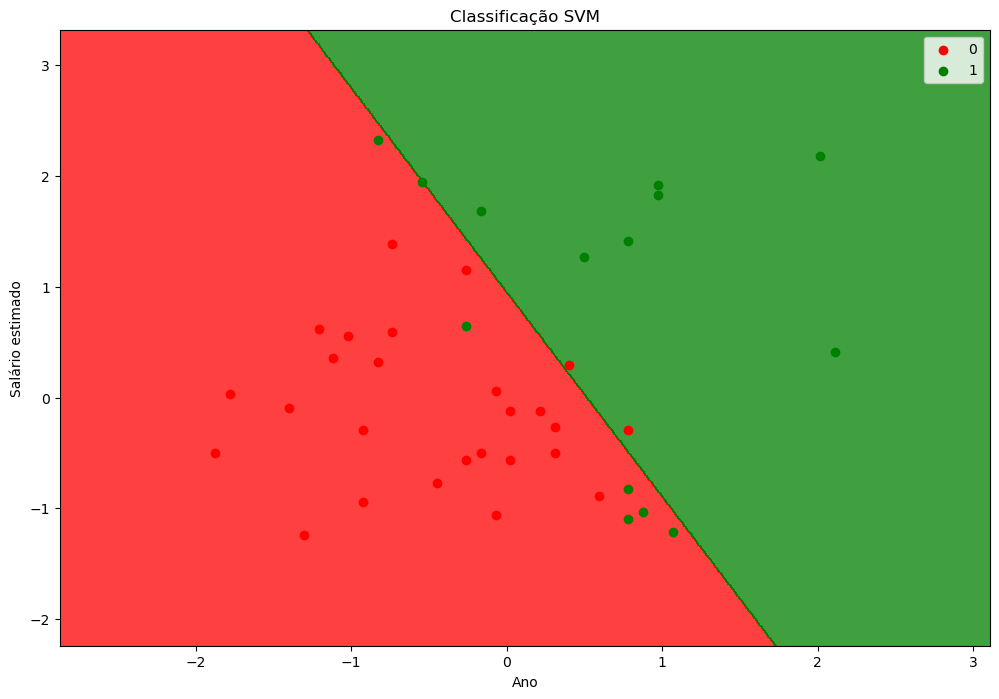

In [90]:
# visualizar o modelo
visualizarSVM(compras_teste, classes_teste,SVM_polinomial)

# Modelo Sigmoide

In [91]:
# treinando o modelo para gerar o classificador usando a função kernel sigmoide.
SVM_sigmoidal = SVC(kernel = 'sigmoid', gamma = 'scale', C = 0.2, coef0 = 2)
SVM_sigmoidal.fit(compras_treino, classes_treino)

SVC(C=0.2, coef0=2, kernel='sigmoid')

In [92]:
# verificando acurácia do modelo
predicao_sigmoidal = SVM_sigmoidal.predict(compras_teste)
acuracia_sigmoidal = accuracy_score(classes_teste,predicao_sigmoidal)
print('Acurácia de classificação: {}'.format(round(acuracia_sigmoidal,3)*100)+'%')

Acurácia de classificação: 65.0%


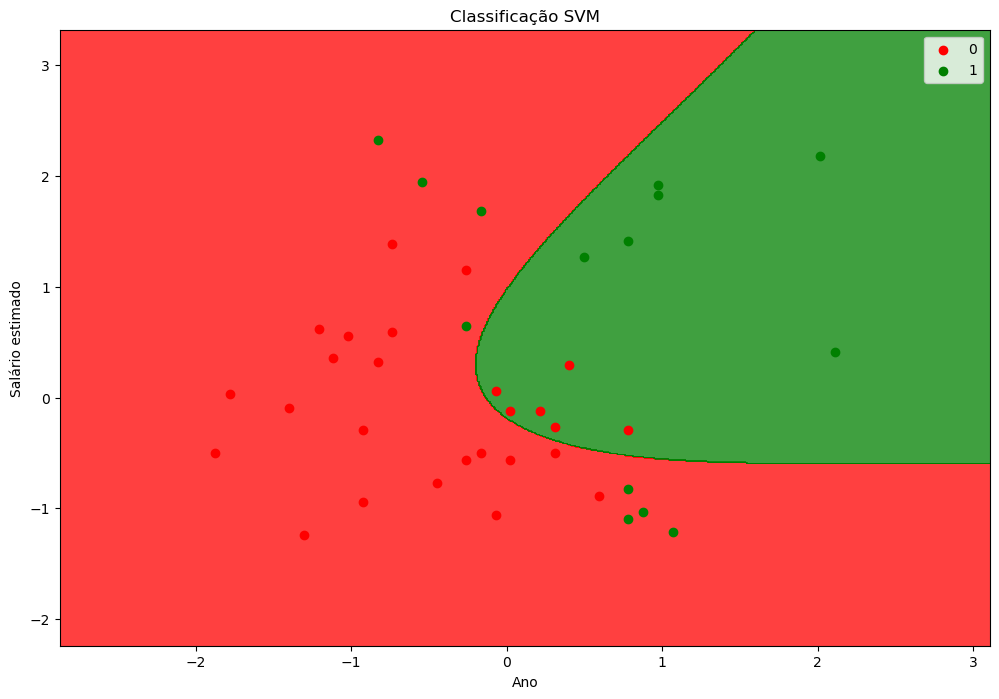

In [93]:
visualizarSVM(compras_teste, classes_teste,SVM_sigmoidal)